In [ ]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [43]:
# Read the data

# Read the data using a raw string (r'...') to avoid escape sequence issues
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\DataSetNvidiaK\\NVDA.csv')

# Show the data
df 





,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000
...,...,...,...,...,...,...,...
6553,2025-02-10,133.570007,133.570007,135.000000,129.960007,130.089996,216989100
6554,2025-02-11,132.800003,132.800003,134.479996,131.020004,132.580002,178902400
6555,2025-02-12,131.139999,131.139999,132.240005,129.080002,130.020004,160278600
6556,2025-02-13,135.289993,135.289993,136.500000,131.169998,131.559998,197430000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6558 non-null   object 
 1   Adj Close  6558 non-null   float64
 2   Close      6558 non-null   float64
 3   High       6558 non-null   float64
 4   Low        6558 non-null   float64
 5   Open       6558 non-null   float64
 6   Volume     6558 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 358.8+ KB


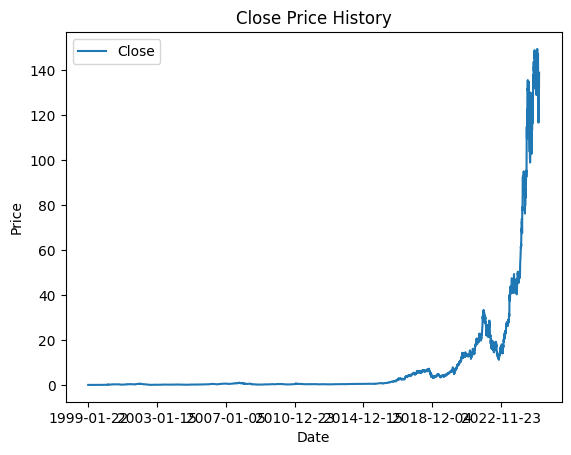

In [36]:
# Plot the Data 
df.plot(x="Date",  y="Close")
#plt.xticks(rotations=95)
plt.title('Close Price History')
plt.ylabel('Price')
plt.show()

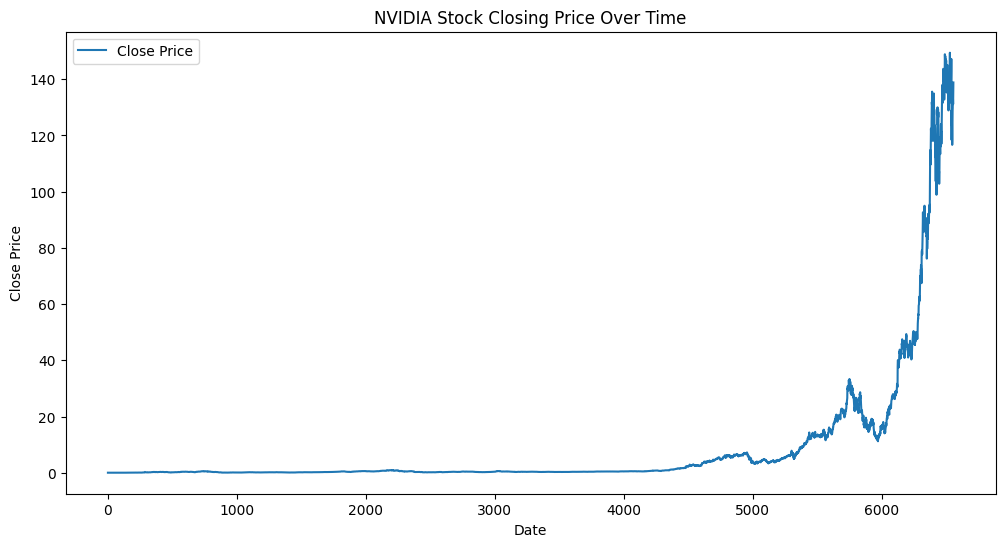

In [ ]:
# Time series plot Closing price 
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('NVIDIA Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

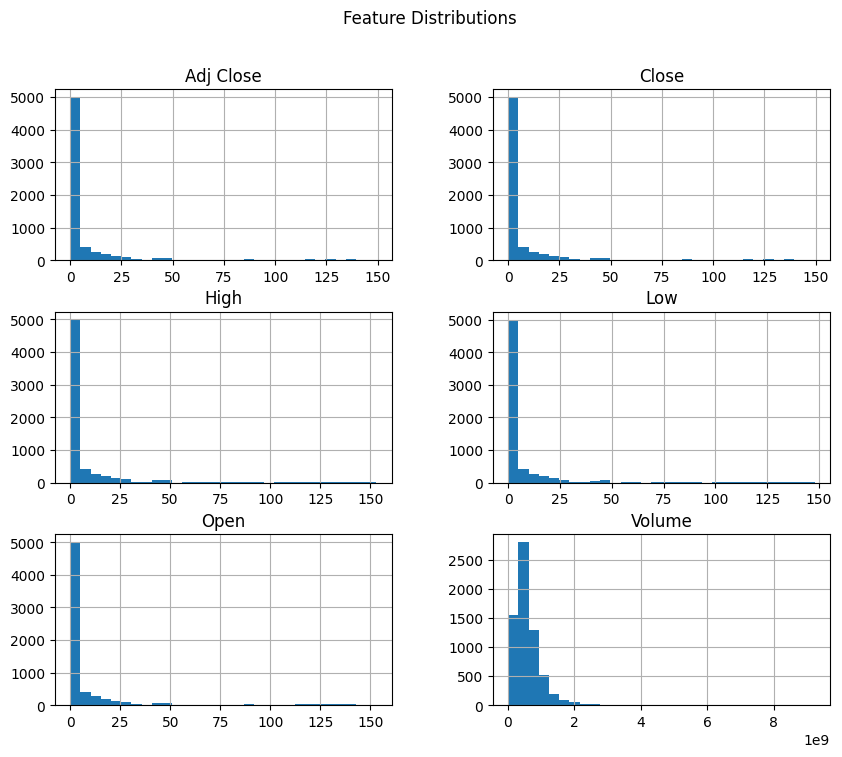

In [ ]:
# Feature Distribution 
df.hist(figsize=(10, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

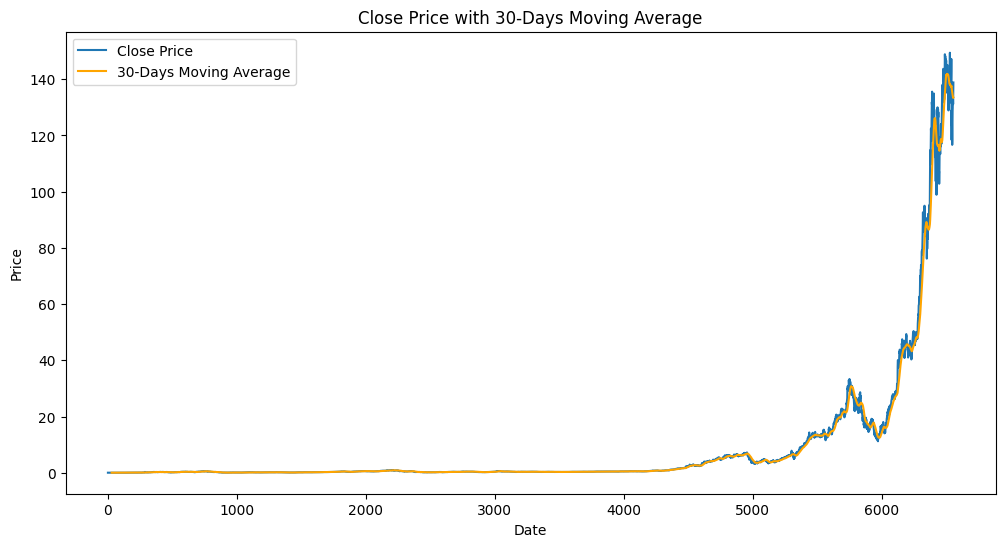

In [ ]:
# Trend Analysis 
df['Close_30Days_Mean'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['Close_30Days_Mean'], label='30-Days Moving Average', color='orange')
plt.title('Close Price with 30-Days Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Insigh Analysis 

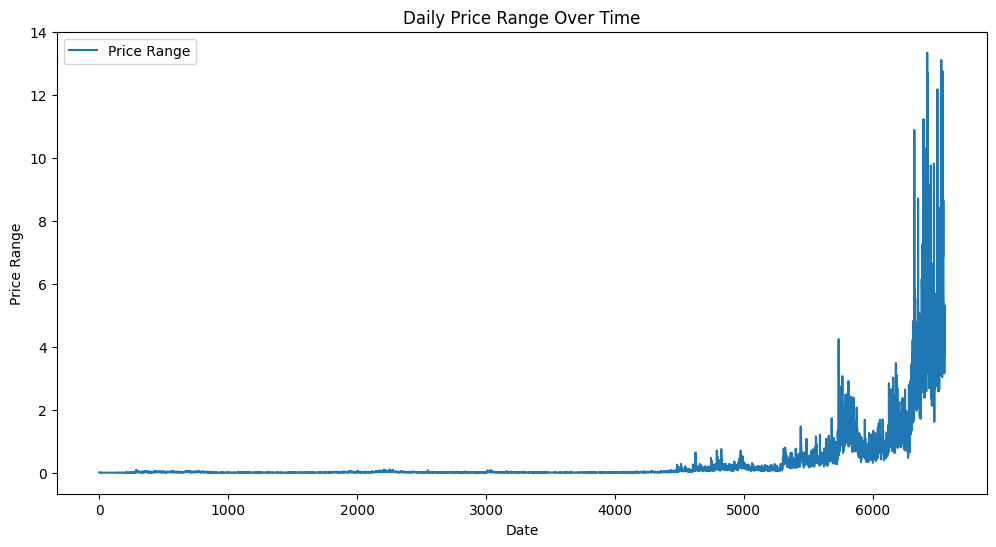

In [51]:
# Price Range Analysis 

df['Price Range'] = df['High'] - df['Low']
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price Range'], label='Price Range')
plt.title('Daily Price Range Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.legend()
plt.show()

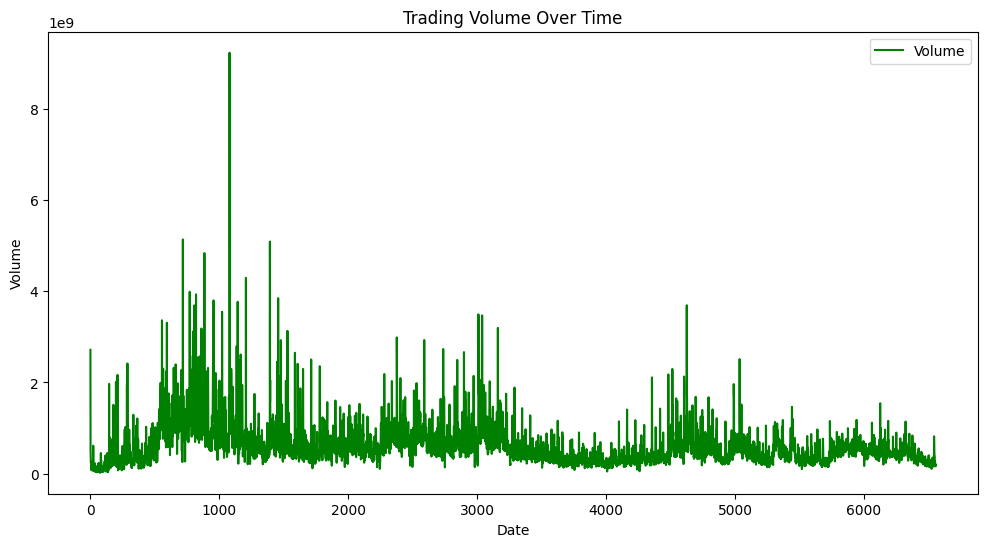

In [ ]:
# Volume Analysis
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label='Volume', color='green')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

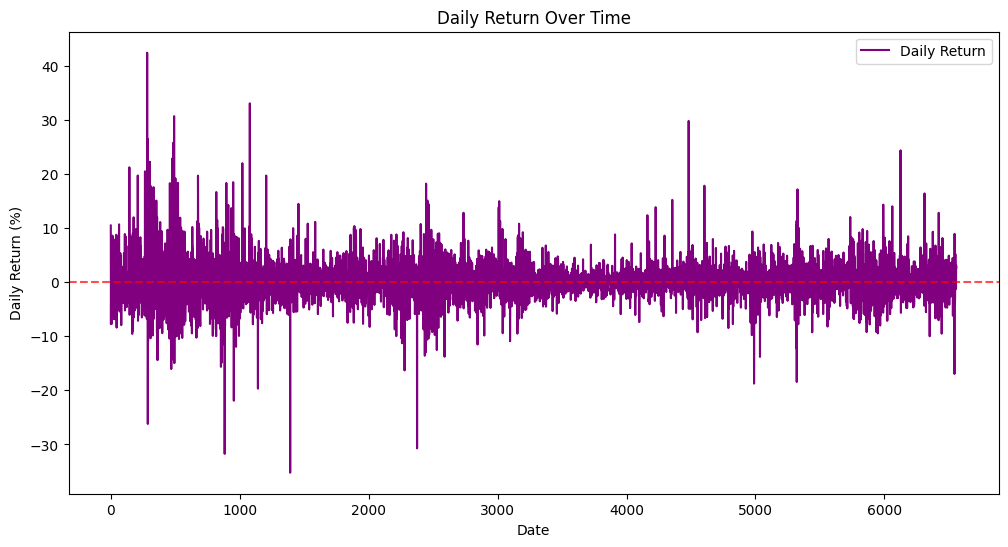

In [52]:
# Volatility Analysis
df['Daily Return'] = df['Close'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily Return'], label='Daily Return', color='purple')
plt.axhline(0, color='red', linestyle='--', alpha=0.7)
plt.title('Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.show()

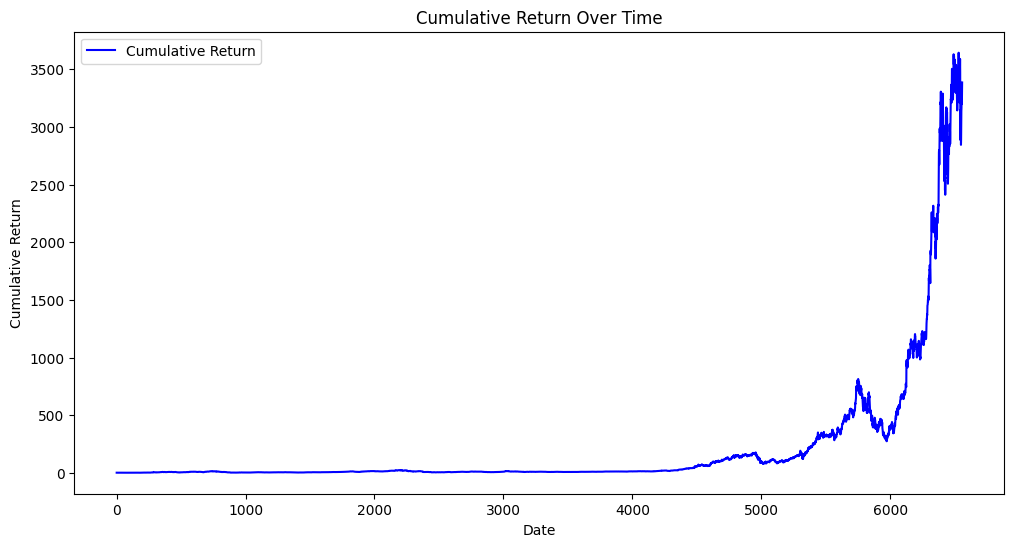

In [53]:
# Cumulative Returns 
df['Cumulative Return'] = (1 + df['Daily Return'] / 100).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative Return'], label='Cumulative Return', color='blue')
plt.title('Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [37]:
# Creating the model
model = RandomForestRegressor()


In [38]:
# Train the model
X = df[["Open","High","Low","Volume"]]
X = X[:int(len(df)-2)]
y = df['Close'].shift(-1)
y = y[:int(len(df)-2)]
model.fit(X,y)

RandomForestRegressor()

In [39]:
# Test the Model
print ('The model score is:' , model.score(X,y))

The model score is: 0.9997630953486272


In [41]:
# Make prediction
new_data = df[["Open","High","Low","Volume"]].tail(2)[0:1]
prediction = model.predict(new_data)
print('The model predicts the last day price to be:',prediction)
print('Actual value:', df[["Close"]].tail(1).values[0][0])

The model predicts the last day price to be: [134.30830246]
Actual value: 138.8500061
